In [2]:
import pandas as pd
df = pd.read_csv('../data/ipdr_synthetic_4 (7-10%).csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78086 entries, 0 to 78085
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_id        78086 non-null  object 
 1   user_id         78086 non-null  object 
 2   imsi            78086 non-null  object 
 3   imei            78086 non-null  object 
 4   timestamp       78086 non-null  object 
 5   domain          78086 non-null  object 
 6   ip_src          78086 non-null  object 
 7   ip_dst          78086 non-null  object 
 8   port            78086 non-null  int64  
 9   protocol        78086 non-null  object 
 10  duration        78086 non-null  float64
 11  bytes_sent      78086 non-null  int64  
 12  bytes_received  78086 non-null  int64  
 13  vpn_usage       78086 non-null  bool   
 14  cell_id         78086 non-null  object 
 15  location_lat    78086 non-null  float64
 16  location_lon    78086 non-null  float64
 17  is_fraud        78086 non-null 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# --- Configuration ---
# Set plotting style and suppress warnings for a cleaner output
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

print("Libraries imported and settings configured.")


Libraries imported and settings configured.


In [4]:
# --- 1. Data Loading and Initial Preparation ---

def load_and_prepare_data(filepath):
    """
    Loads data, performs initial cleaning, and engineers new features.
    """
    print("--- 1. Loading and Preparing Data ---")
    try:
        df = pd.read_csv(filepath)
        print(f"Successfully loaded {filepath}. Shape: {df.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}. Please check the path.")
        return None

    # --- Data Cleaning and Type Conversion ---
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df.dropna(subset=['timestamp'], inplace=True)

    # --- Feature Engineering ---
    df['total_bytes'] = df['bytes_sent'] + df['bytes_received']
    df['hour_of_day'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['tld'] = df['domain'].apply(lambda x: str(x).split('.')[-1] if '.' in str(x) else 'unknown')
    df['fraud_status'] = df['is_fraud'].apply(lambda x: 'Fraud' if x == 1 else 'Normal')

    print("Data preparation complete. New features created: 'total_bytes', 'hour_of_day', 'day_of_week', 'tld', 'fraud_status'.\n")
    return df

# --- Main Execution ---
# IMPORTANT: Replace with the actual path to your dataset

FILEPATH = '../data/ipdr_synthetic_4 (7-10%).csv'
df = load_and_prepare_data(FILEPATH)

# Display the first few rows with new features
if df is not None:
    display(df.head())


--- 1. Loading and Preparing Data ---
Successfully loaded ../data/ipdr_synthetic_4 (7-10%).csv. Shape: (78086, 20)
Data preparation complete. New features created: 'total_bytes', 'hour_of_day', 'day_of_week', 'tld', 'fraud_status'.



,event_id,user_id,imsi,imei,timestamp,domain,ip_src,ip_dst,port,protocol,...,location_lat,location_lon,is_fraud,anomaly_type,runbook_id,total_bytes,hour_of_day,day_of_week,tld,fraud_status
0,c012b2fad7b875eb,9189844258334d45,81e804a659d400f2,b5b7b201ccf927b4,2025-09-01 00:00:00.593934,site477.example,10.0.128.105,10.0.99.84,80,TCP,...,30.71,76.76,0,NaN,NaN,175774,0,Monday,example,Normal
1,db0c150879b18219,649090a0f91222a8,06b84c677d69e0e9,a56ee01016243344,2025-09-01 00:00:00.790089,site50.example,10.3.27.6,10.0.137.127,5228,TCP,...,30.79,76.84,0,NaN,NaN,5838,0,Monday,example,Normal
2,054ceb1e5c396812,7bfa9ce984b2f6a6,e0ab3ddc53a44b21,9cd50e2a80916749,2025-09-01 00:00:02.272500,google.com,10.2.43.249,10.0.59.238,5060,TCP,...,30.71,76.76,0,NaN,NaN,75207,0,Monday,com,Normal
3,d253bd207a1633e4,7ede5a91e236cc8b,f946b11e563b154a,536820633c32cb96,2025-09-01 00:00:05.204634,site747.example,10.2.147.15,10.0.127.218,443,TCP,...,30.72,76.77,0,NaN,NaN,48187,0,Monday,example,Normal
4,f249541656cfc819,31e6b343b1b4cefc,f3858a1172dca418,cf84ba574306c945,2025-09-01 00:00:05.573124,site85.example,10.1.23.4,10.0.173.215,80,TCP,...,30.77,76.82,0,NaN,NaN,6293,0,Monday,example,Normal


In [5]:
# --- 2. High-Level Dataset Overview ---

if df is not None:
    print("[-- Dataset Info --]")
    df.info()

    print("\n[-- Missing Values --]")
    missing_vals = df.isnull().sum()
    print(missing_vals[missing_vals > 0])

    print("\n[-- Numerical Summary --]")
    display(df.describe())

    print("\n[-- Categorical Summary --]")
    display(df.describe(include=['object', 'bool']))


[-- Dataset Info --]
<class 'pandas.core.frame.DataFrame'>
Index: 76886 entries, 0 to 78085
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        76886 non-null  object        
 1   user_id         76886 non-null  object        
 2   imsi            76886 non-null  object        
 3   imei            76886 non-null  object        
 4   timestamp       76886 non-null  datetime64[ns]
 5   domain          76886 non-null  object        
 6   ip_src          76886 non-null  object        
 7   ip_dst          76886 non-null  object        
 8   port            76886 non-null  int64         
 9   protocol        76886 non-null  object        
 10  duration        76886 non-null  float64       
 11  bytes_sent      76886 non-null  int64         
 12  bytes_received  76886 non-null  int64         
 13  vpn_usage       76886 non-null  bool          
 14  cell_id         76886 non-null  object

,timestamp,port,duration,bytes_sent,bytes_received,location_lat,location_lon,is_fraud,total_bytes,hour_of_day
count,76886,"76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00"
mean,2025-09-04 13:03:34.434841600,"2,402.01",52.68,"48,310.27","44,603.51",30.75,76.80,0.07,"92,913.78",12.48
min,2025-09-01 00:00:00.593934,80.00,1.00,20.00,17.00,30.70,76.75,0.00,133.00,0.00
25%,2025-09-02 19:05:57.281980672,80.00,15.13,"7,576.00","6,263.00",30.73,76.78,0.00,"15,480.25",5.00
50%,2025-09-04 14:52:52.480380416,443.00,31.27,"18,695.00","16,922.00",30.75,76.80,0.00,"37,757.50",14.00
75%,2025-09-06 05:21:12.992236544,"5,228.00",62.68,"45,337.50","44,565.00",30.78,76.83,0.00,"92,125.00",19.00
max,2025-09-07 23:59:53.190766,"11,996.00","1,766.53","10,750,732.00","9,846,166.00",30.80,76.85,1.00,"19,690,840.00",23.00
std,NaN,"2,897.42",72.61,"143,546.96","106,722.41",0.03,0.03,0.25,"223,528.09",7.61



[-- Categorical Summary --]


,event_id,user_id,imsi,imei,domain,ip_src,ip_dst,protocol,vpn_usage,cell_id,anomaly_type,runbook_id,day_of_week,tld,fraud_status
count,76886,76886,76886,76886,76886,76886,76886,76886,76886,76886,5046,5046,76886,76886,76886
unique,76886,2000,2473,2000,2004,65773,44943,2,2,1819,5,4437,7,4,2
top,c012b2fad7b875eb,8d02d1346c4e9a5b,9c9c202e0fb9eca5,a5614866490b6f0f,google.com,10.0.212.204,10.0.208.82,TCP,False,cell_136,VOIP_SPOOF,EXFIL_8,Saturday,example,Normal
freq,1,112,112,112,3287,5,51,71068,72876,228,1287,47,11117,67938,71840


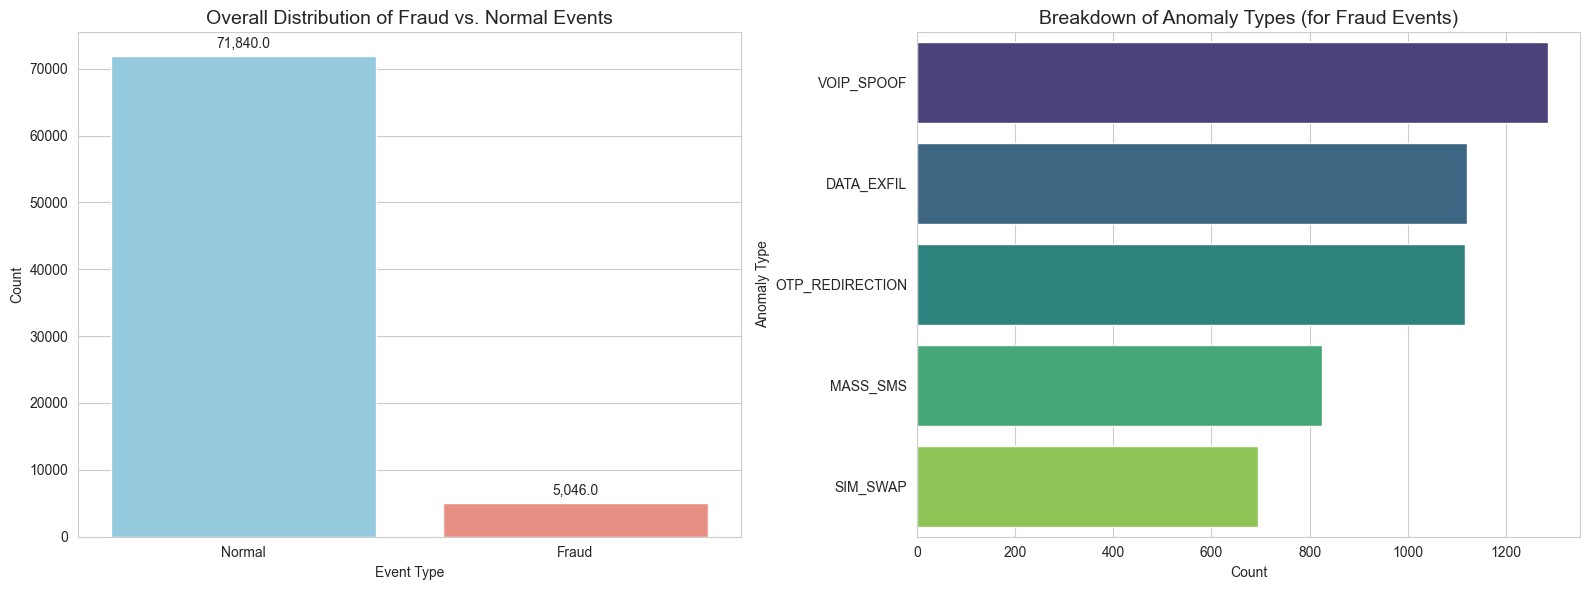

In [6]:
# --- 3. Target Variable Analysis ---

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Overall Fraud Distribution
    ax1 = sns.countplot(x='fraud_status', data=df, ax=axes[0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
    ax1.set_title('Overall Distribution of Fraud vs. Normal Events', fontsize=14)
    ax1.set_xlabel('Event Type')
    ax1.set_ylabel('Count')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    # Plot 2: Breakdown of Anomaly Types for Fraudulent Events
    fraud_df = df[df['is_fraud'] == 1]
    ax2 = sns.countplot(y='anomaly_type', data=fraud_df, order=fraud_df['anomaly_type'].value_counts().index, ax=axes[1], palette='viridis')
    ax2.set_title('Breakdown of Anomaly Types (for Fraud Events)', fontsize=14)
    ax2.set_xlabel('Count')
    ax2.set_ylabel('Anomaly Type')

    plt.tight_layout()
    plt.show()


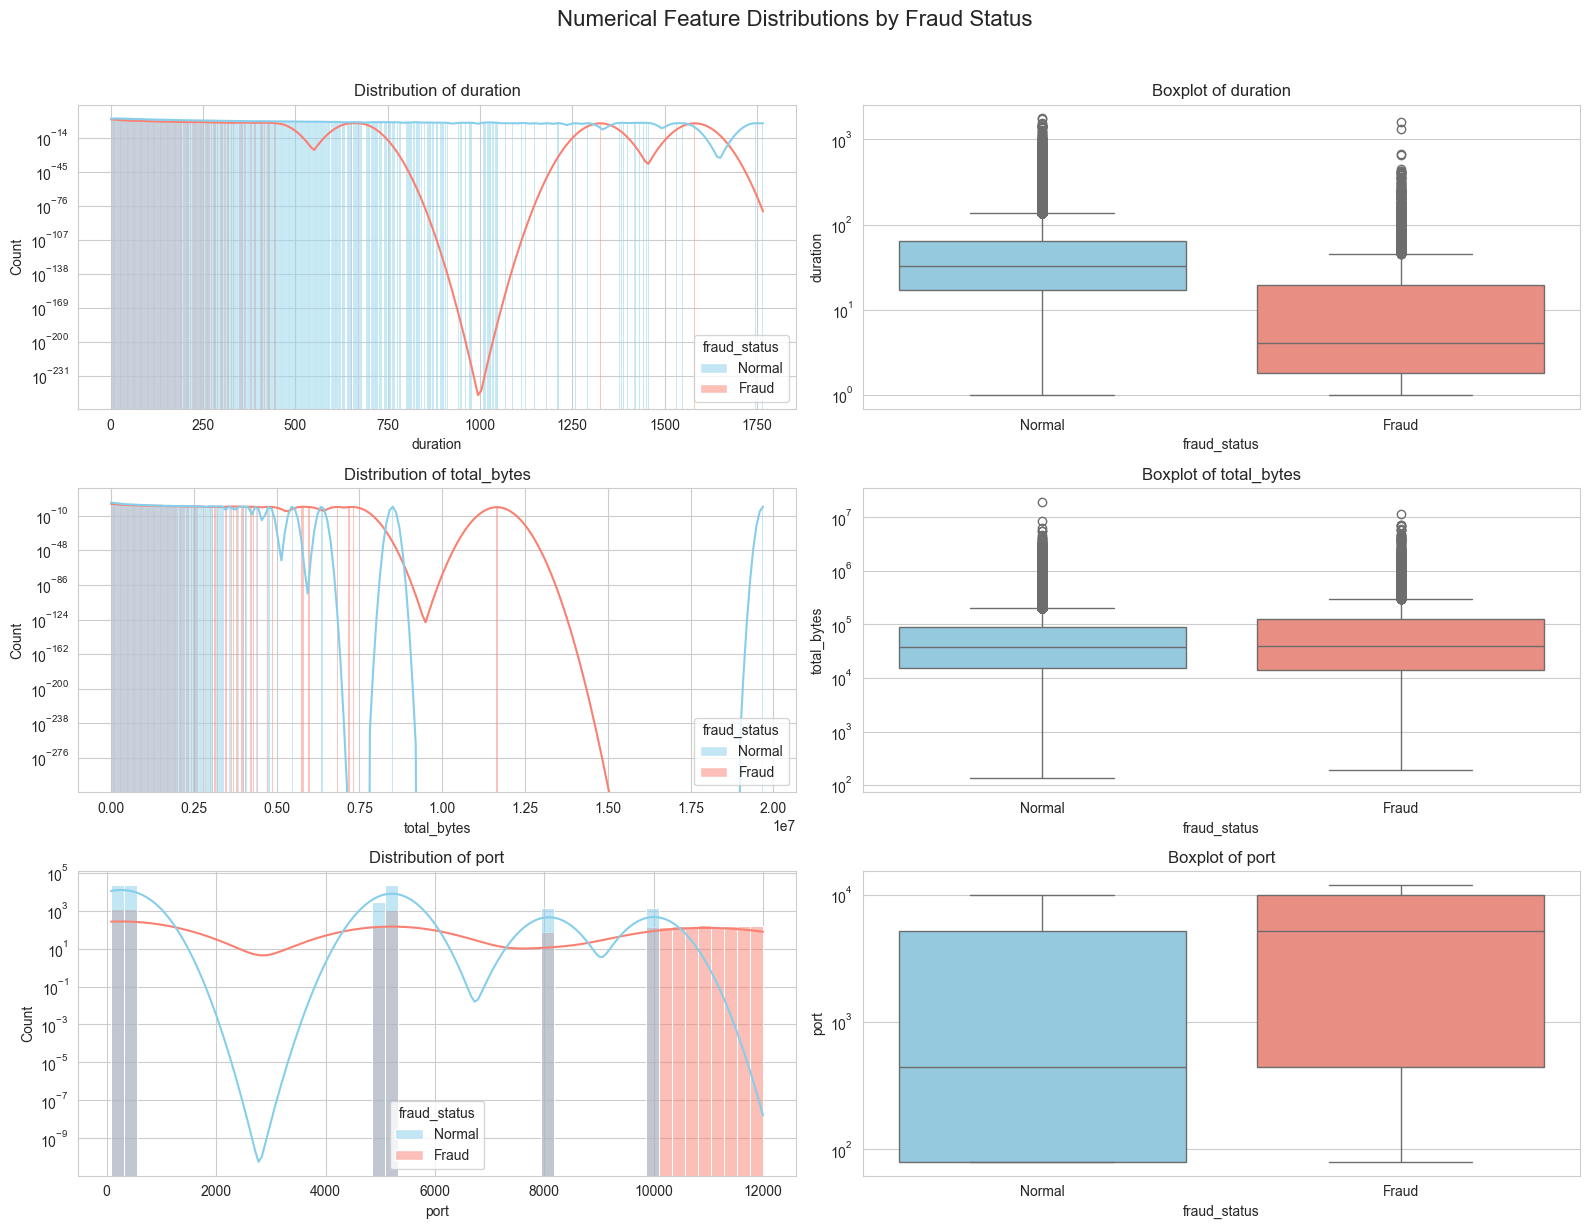

In [8]:
# --- 4.1. Numerical Feature Analysis ---

if df is not None:
    numerical_features = ['duration', 'total_bytes', 'port']
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 12))
    fig.suptitle('Numerical Feature Distributions by Fraud Status', fontsize=16, y=1.02)

    for i, col in enumerate(numerical_features):
        sns.histplot(data=df, x=col, hue='fraud_status', kde=True, ax=axes[i, 0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i, 0].set_title(f'Distribution of {col}')
        axes[i, 0].set_yscale('log')

        sns.boxplot(data=df, x='fraud_status', y=col, ax=axes[i, 1], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_yscale('log')

    plt.tight_layout()
    plt.show()


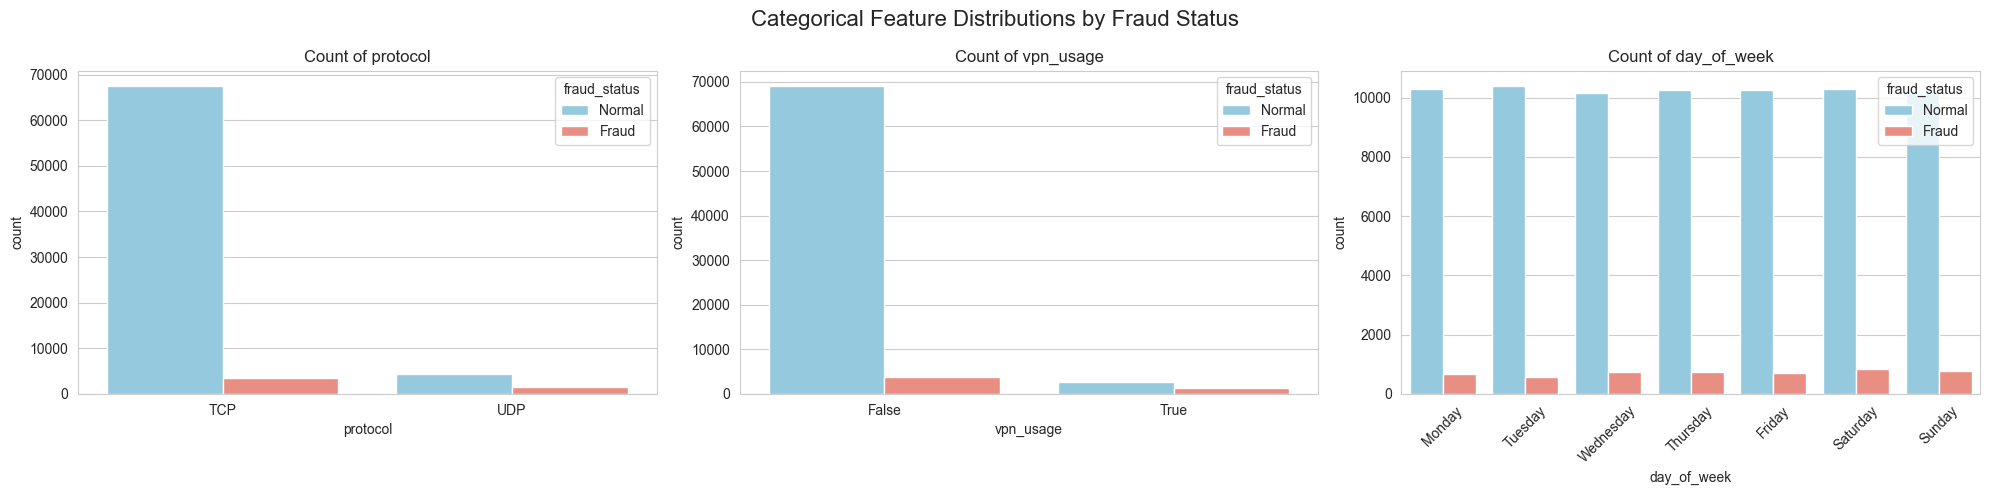

In [9]:
# --- 4.2. Categorical Feature Analysis ---

if df is not None:
    categorical_features = ['protocol', 'vpn_usage', 'day_of_week']
    fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))
    fig.suptitle('Categorical Feature Distributions by Fraud Status', fontsize=16)

    for i, col in enumerate(categorical_features):
        sns.countplot(data=df, x=col, hue='fraud_status', ax=axes[i], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i].set_title(f'Count of {col}')
        if col == 'day_of_week':
            axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


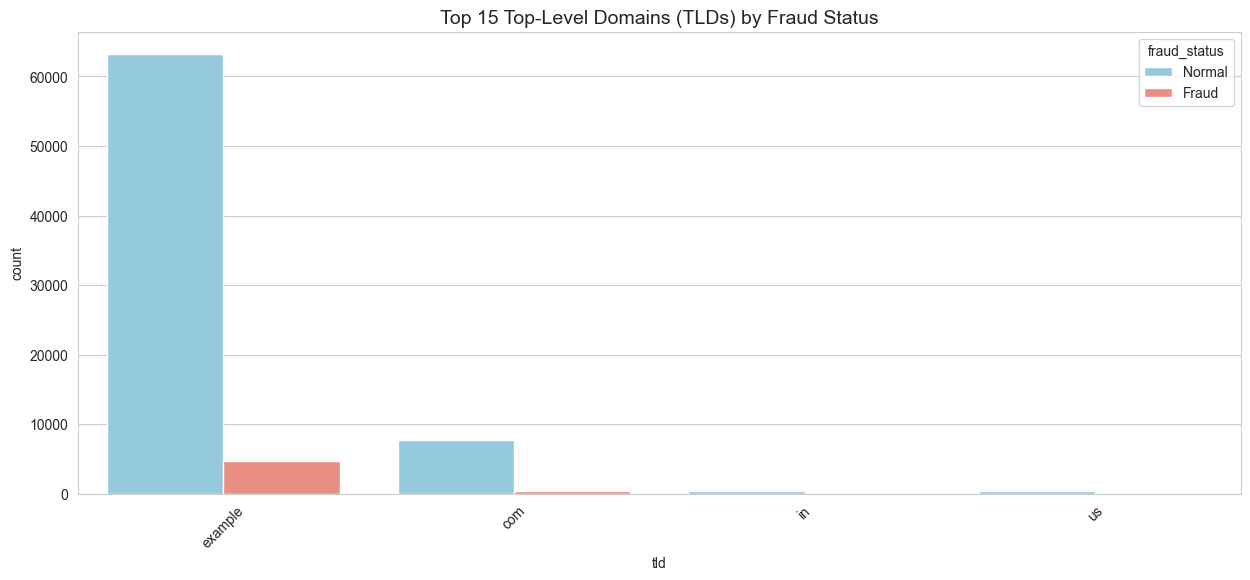

In [10]:
# --- 4.3. Analysis of Engineered TLD Feature ---

if df is not None:
    plt.figure(figsize=(15, 6))
    top_tlds = df['tld'].value_counts().nlargest(15).index
    sns.countplot(data=df[df['tld'].isin(top_tlds)], x='tld', hue='fraud_status', order=top_tlds, palette={'Normal':'skyblue', 'Fraud':'salmon'})
    plt.title('Top 15 Top-Level Domains (TLDs) by Fraud Status', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


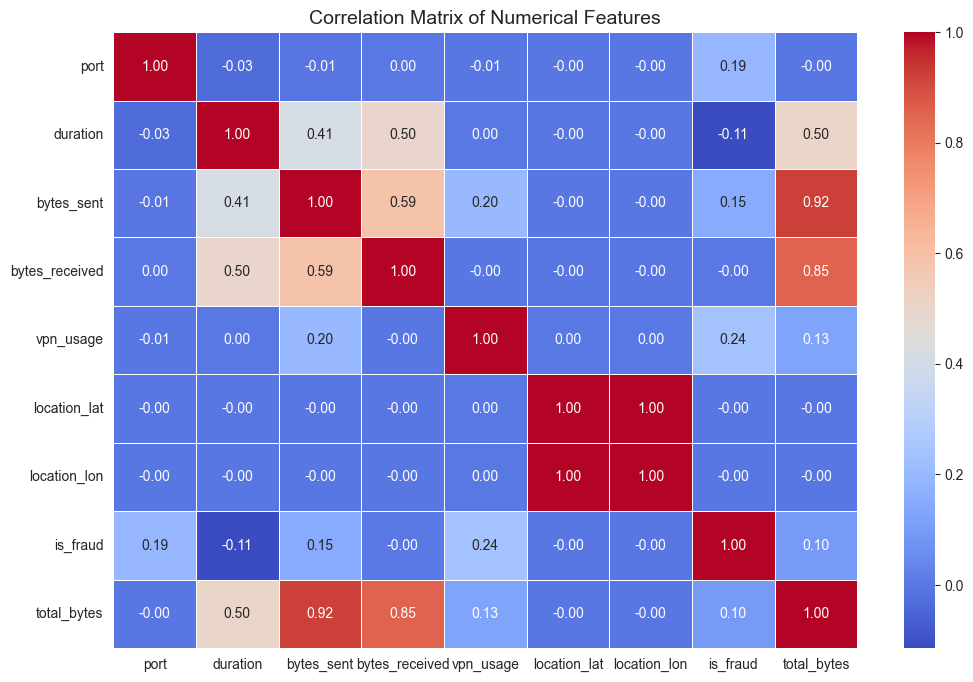

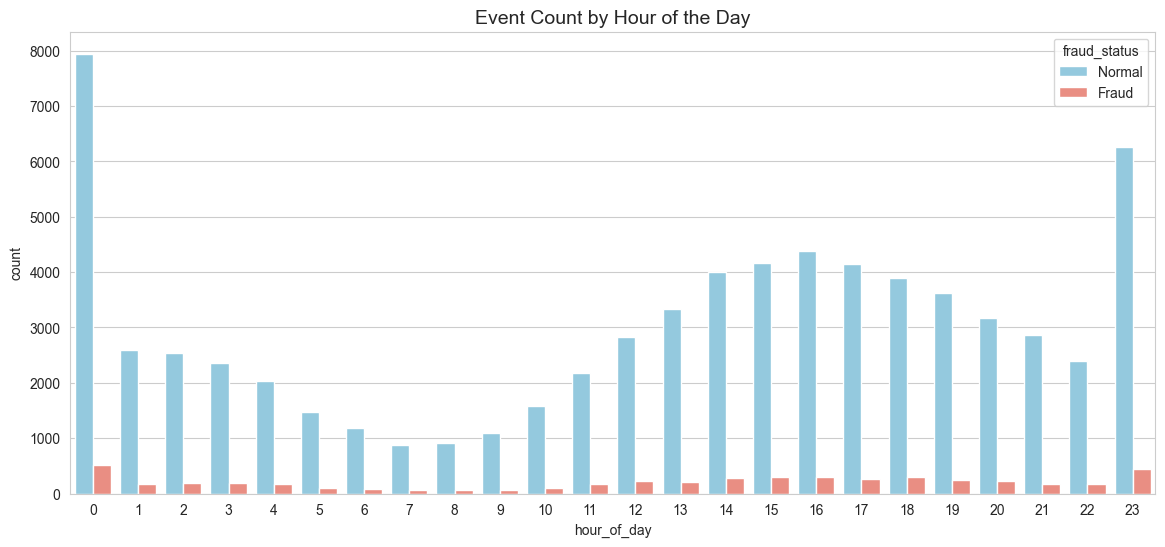

In [11]:
# --- 5.1. Correlation and Temporal Analysis ---

if df is not None:
    # --- Correlation Heatmap ---
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=14)
    plt.show()

    # --- Temporal Analysis: Fraud by Hour ---
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='hour_of_day', hue='fraud_status', palette={'Normal':'skyblue', 'Fraud':'salmon'})
    plt.title('Event Count by Hour of the Day', fontsize=14)
    plt.show()


In [33]:
import numpy as np
import plotly.express as px

# This cell assumes 'df' is your prepared DataFrame from the EDA.

if df is not None:
    print("\nGenerating interactive map of event locations...")
    
    # Separate fraud and normal events
    fraud_locations = df[df['is_fraud'] == 1].copy()
    normal_locations = df[df['is_fraud'] == 0].sample(
        n=min(5000, len(df[df['is_fraud']==0])),
        random_state=42
    ).copy()

    # --- IMPROVEMENT: Add 'jitter' to the normal locations ---
    # This adds a small amount of random noise to spread out overlapping points.
    # The amount of jitter can be adjusted based on your map's zoom level.
    jitter_amount = 0.01 
    normal_locations['location_lat'] += np.random.uniform(-jitter_amount, jitter_amount, size=len(normal_locations))
    normal_locations['location_lon'] += np.random.uniform(-jitter_amount, jitter_amount, size=len(normal_locations))
    
    # Combine the dataframes for plotting
    map_df = pd.concat([fraud_locations, normal_locations])

    # The plotting code itself remains the same, as it was already correct.
    fig = px.scatter_geo(map_df,
                         lat='location_lat',
                         lon='location_lon',
                         color='fraud_status',
                         color_discrete_map={'Normal': 'blue', 'Fraud': 'red'},
                         hover_name='user_id',
                         hover_data=['anomaly_type', 'domain', 'total_bytes'],
                         title='Geospatial Distribution of Normal vs. Fraudulent Events',
                         projection='natural earth')
    fig.show()



Generating interactive map of event locations...


In [13]:
# Assumes 'df' is your pre-loaded and prepared DataFrame from the EDA steps.

# Sort by user and time, which is crucial for time-based features
df = df.sort_values(by=['user_id', 'timestamp']).reset_index(drop=True)

print("DataFrame sorted by user_id and timestamp.")


DataFrame sorted by user_id and timestamp.


In [14]:
print("Creating user-level aggregate features...")

# Define aggregations to create a user profile
user_agg_features = df.groupby('user_id').agg(
    # Connection patterns
    total_connections=('event_id', 'count'),
    unique_dst_ips=('ip_dst', 'nunique'),
    unique_cell_ids=('cell_id', 'nunique'),
    
    # Data usage patterns
    avg_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    total_data_usage=('total_bytes', 'sum'),
    avg_data_per_session=('total_bytes', 'mean'),
    
    # VPN usage
    vpn_sessions=('vpn_usage', 'sum'),
    
    # Location patterns
    lat_std=('location_lat', 'std'),
    lon_std=('location_lon', 'std')
)

# Add a feature for VPN usage percentage
user_agg_features['vpn_usage_ratio'] = user_agg_features['vpn_sessions'] / user_agg_features['total_connections']

# Clean up column names for merging
user_agg_features.columns = ['user_' + col for col in user_agg_features.columns]
user_agg_features.fillna(0, inplace=True) # Fill std=NaN for users with 1 connection

# Merge these new features back into the original dataframe
df = pd.merge(df, user_agg_features, on='user_id', how='left')

print("User-level features created and merged.")

# Display some of the new features
new_feature_cols = [col for col in df.columns if col.startswith('user_')]
display(df[['user_id', 'timestamp'] + new_feature_cols].head())


Creating user-level aggregate features...
User-level features created and merged.


,user_id,timestamp,user_id,user_total_connections,user_unique_dst_ips,user_unique_cell_ids,user_avg_duration,user_std_duration,user_total_data_usage,user_avg_data_per_session,user_vpn_sessions,user_lat_std,user_lon_std,user_vpn_usage_ratio
0,00161c58988e3bd9,2025-09-01 00:08:35.797038,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
1,00161c58988e3bd9,2025-09-01 00:34:21.301139,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
2,00161c58988e3bd9,2025-09-01 00:42:34.939184,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
3,00161c58988e3bd9,2025-09-01 00:50:04.177045,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
4,00161c58988e3bd9,2025-09-01 00:52:52.338983,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04


In [15]:
print("Creating time-window features (this may take a minute)...")

# Set timestamp as index for rolling window operations
df_time_indexed = df.set_index('timestamp')

# Calculate rolling counts of events per user over different time windows
df['user_events_last_24h'] = df_time_indexed.groupby('user_id')['event_id'].rolling('24h').count().reset_index(0, drop=True)
df['user_events_last_1h'] = df_time_indexed.groupby('user_id')['event_id'].rolling('1h').count().reset_index(0, drop=True)

# Calculate rolling sum of data used by a user
df['user_bytes_last_24h'] = df_time_indexed.groupby('user_id')['total_bytes'].rolling('24h').sum().reset_index(0, drop=True)

df.fillna(0, inplace=True) # Fill NaNs created by rolling windows at the start

print("Time-window features created.")
display(df[['user_id', 'timestamp', 'user_events_last_1h', 'user_events_last_24h', 'user_bytes_last_24h']].tail())


Creating time-window features (this may take a minute)...
Time-window features created.


,user_id,timestamp,user_events_last_1h,user_events_last_24h,user_bytes_last_24h
76881,fff32e44e4d7cdbd,2025-09-06 03:10:33.912735,0.00,0.00,0.00
76882,fff32e44e4d7cdbd,2025-09-06 05:54:03.875522,0.00,0.00,0.00
76883,fff32e44e4d7cdbd,2025-09-06 05:55:09.959022,0.00,0.00,0.00
76884,fff32e44e4d7cdbd,2025-09-06 06:04:54.216290,0.00,0.00,0.00
76885,fff32e44e4d7cdbd,2025-09-07 08:45:24.795851,0.00,0.00,0.00


In [16]:
print("Encoding categorical features...")

# For binary categorical features, simple mapping is efficient
df['protocol_is_tcp'] = df['protocol'].apply(lambda x: 1 if x == 'TCP' else 0)

# Convert boolean 'vpn_usage' to integer (True=1, False=0)
# Note: This might have been done in the EDA, but re-running is safe.
df['vpn_usage'] = df['vpn_usage'].astype(int)

print("Binary features 'protocol' and 'vpn_usage' converted to integers.")
display(df[['protocol', 'protocol_is_tcp', 'vpn_usage']].head())


Encoding categorical features...
Binary features 'protocol' and 'vpn_usage' converted to integers.


,protocol,protocol_is_tcp,vpn_usage
0,TCP,1,0
1,TCP,1,0
2,UDP,0,0
3,UDP,0,0
4,TCP,1,0


In [17]:
print("Feature engineering complete. Reviewing final DataFrame.")

print("\nFinal DataFrame Info:")
df.info()

print("\nSample of the final DataFrame with all new features:")
display(df.head())


Feature engineering complete. Reviewing final DataFrame.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76886 entries, 0 to 76885
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   event_id                   76886 non-null  object        
 1   user_id                    76886 non-null  object        
 2   imsi                       76886 non-null  object        
 3   imei                       76886 non-null  object        
 4   timestamp                  76886 non-null  datetime64[ns]
 5   domain                     76886 non-null  object        
 6   ip_src                     76886 non-null  object        
 7   ip_dst                     76886 non-null  object        
 8   port                       76886 non-null  int64         
 9   protocol                   76886 non-null  object        
 10  duration                   76886 non-null  float64

,event_id,user_id,imsi,imei,timestamp,domain,ip_src,ip_dst,port,protocol,...,user_total_data_usage,user_avg_data_per_session,user_vpn_sessions,user_lat_std,user_lon_std,user_vpn_usage_ratio,user_events_last_24h,user_events_last_1h,user_bytes_last_24h,protocol_is_tcp
0,5e6e486521976325,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:08:35.797038,site60.example,10.0.254.221,10.0.168.43,80,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1
1,05ee4944a48b5d48,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:34:21.301139,site71.example,10.0.254.70,10.0.125.134,80,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1
2,df9cc08c9c97f707,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:42:34.939184,whatsapp.com,10.0.254.116,10.0.44.241,443,UDP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,0
3,fcf41d8d6ae2c99c,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:50:04.177045,facebook.com,10.0.254.172,10.0.164.179,5060,UDP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,0
4,6500c0e290fc2bb6,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:52:52.338983,site1471.example,10.0.254.167,10.0.254.42,443,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# --- New imports for this workflow ---
from imblearn.pipeline import Pipeline as ImbPipeline # Renamed to avoid confusion
from imblearn.over_sampling import SMOTE

# Assumes 'df' is your final feature-engineered DataFrame.



# Assumes 'df' is your final feature-engineered DataFrame.

# 1. Define the Target Variable
y = df['is_fraud']

# 2. Define the Features (X)
# --- FIX IS HERE ---
# Add raw high-cardinality object columns to the drop list
features_to_drop = [
    'event_id', 'user_id', 'imsi', 'imei', 'timestamp', 'protocol',
    'is_fraud', 'anomaly_type', 'runbook_id', 'fraud_status',
    'domain', 'ip_src', 'ip_dst', 'cell_id' # These are the new additions
]
X = df.drop(columns=features_to_drop)

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Verify that X_train no longer contains object columns that are not handled
print("\nRemaining object columns in X_train after dropping:")
print(X_train.select_dtypes(include=['object']).columns)




Data successfully split into training and testing sets.
Training set shape: (57664, 26)
Testing set shape: (19222, 26)

Remaining object columns in X_train after dropping:
Index(['day_of_week', 'tld'], dtype='object')


In [28]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# 1. Identify Numerical and Categorical Feature Names
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create the Preprocessing Step (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
# 3. Calculate scale_pos_weight for Imbalance Handling
# This is the key step from your previous code.
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}\n")

# 3. Dynamically and Safely Configure SMOTE
print("--- Configuring SMOTE ---")
print("Class distribution before SMOTE:", y_train.value_counts().to_dict())

# Determine the number of samples in the minority class
minority_class_count = y_train.value_counts().min()

# Set k_neighbors to be one less than the number of minority samples, if it's too small.
k_neighbors_value = max(1, minority_class_count - 1)
print(f"Adjusting SMOTE k_neighbors to: {k_neighbors_value}")

# 4. Create the Full Pipeline with scale_pos_weight
# This pipeline is simpler as it doesn't need the imblearn library.
model_pipeline_weighted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight_value, # The key parameter
        random_state=42
    ))
])

print("Model pipeline with 'scale_pos_weight' created successfully:")
display(model_pipeline_weighted)

# 4. Create the Full imblearn Pipeline
# This pipeline correctly applies SMOTE only during the fitting process.





Calculated scale_pos_weight: 14.24

--- Configuring SMOTE ---
Class distribution before SMOTE: {0: 53880, 1: 3784}
Adjusting SMOTE k_neighbors to: 3783
Model pipeline with 'scale_pos_weight' created successfully:


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:


# Fit the newly defined pipeline
model_pipeline_weighted.fit(X_train, y_train)

# You'll also need to get new predictions for the SHAP analysis
y_pred_weighted = model_pipeline_weighted.predict(X_test)

print("Model training complete.")


Model training complete.


Evaluating model performance on the original, untouched test set...

Model ROC AUC Score: 0.9475

--- Classification Report (with SMOTE) ---
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      0.99     17960
   Fraud (1)       0.94      0.89      0.91      1262

    accuracy                           0.99     19222
   macro avg       0.97      0.94      0.95     19222
weighted avg       0.99      0.99      0.99     19222


--- Confusion Matrix (with SMOTE) ---


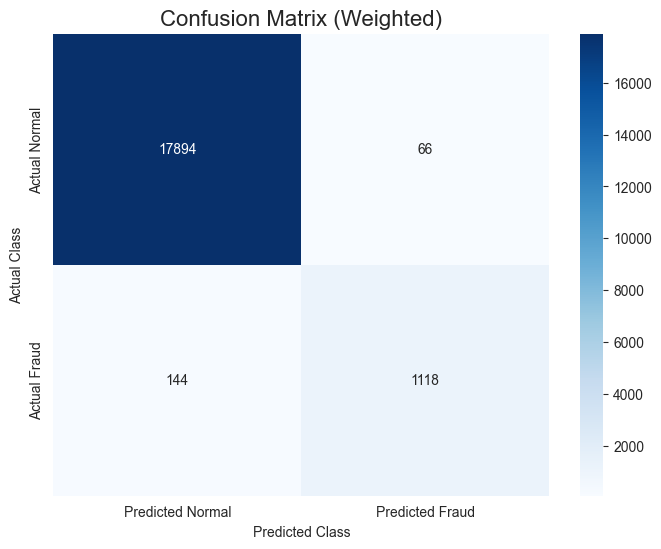

In [ ]:



from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluating model performance on the original, untouched test set...")

# 1. Make predictions on the test data using the trained pipeline
# The pipeline handles all preprocessing of the test data automatically.
y_pred = model_pipeline_weighted.predict(X_test)
y_pred_proba = model_pipeline_weighted.predict_proba(X_test)[:, 1] # Probabilities for the 'Fraud' class

# 2. Calculate Evaluation Metrics
# ROC AUC Score: Measures the model's ability to distinguish between classes. A score of 1.0 is perfect.
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nModel ROC AUC Score: {auc_score:.4f}")

# 3. Generate and Print the Classification Report
# This gives precision, recall, and f1-score for each class.
print("\n--- Classification Report (with SMOTE) ---")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)']))

# 4. Generate and Display the Confusion Matrix
# This visualizes the true positives, false positives, true negatives, and false negatives.
print("\n--- Confusion Matrix (with SMOTE) ---")
cm = confusion_matrix(y_test, y_pred)





plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix (Weighted)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# --- 4. Print the Detailed Classification Report ---
# Your excellent reporting format is preserved here.
print("\n" + "="*60)
print("           Detailed Classification Report")
print("="*60)
report = classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)'])
print(report)

print("Key Metrics Explained:")
print(" - Precision (Fraud): Of all the alerts fired, this percentage was correct. (Measures false alarms)")
print(" - Recall (Fraud): Of all actual fraud, this percentage was caught. (Measures missed fraud)")
print("="*60)








In [26]:
import shap
shap.initjs()

Calculating SHAP values... (this may take a moment)
SHAP values calculated successfully.

--- Global Feature Importance (SHAP Summary Plot) ---


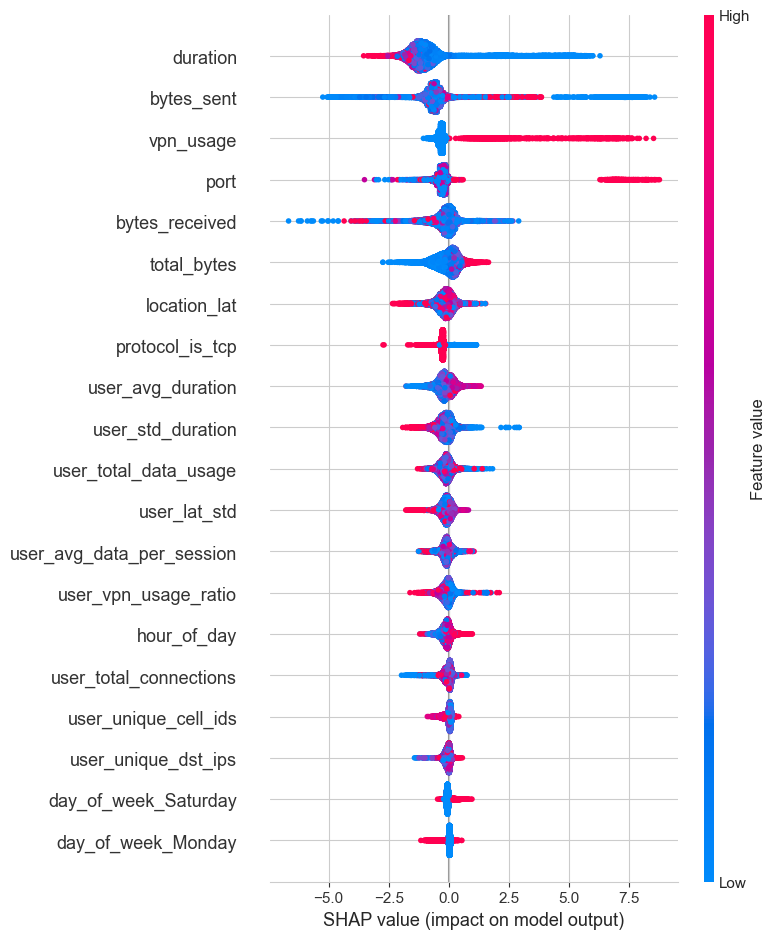


--- Explanation for a Single Correctly Identified Fraud Case ---
Explaining prediction for original index: 72420


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# This cell assumes your pipeline has been trained and you have X_test, y_test, etc.

# Initialize JavaScript for interactive SHAP plots in your notebook
shap.initjs()

# --- 1. Extract Components from the Trained Pipeline ---
classifier = model_pipeline_weighted.named_steps['classifier']
preprocessor = model_pipeline_weighted.named_steps['preprocessor']

# --- 2. Prepare Data for the Explainer ---
X_test_transformed = preprocessor.transform(X_test)

# --- 3. Reconstruct the Final Feature Names ---
numerical_features = preprocessor.transformers_[0][2]
low_cardinality_categorical_features = preprocessor.transformers_[1][2]
onehot_encoder = preprocessor.named_transformers_['cat']
ohe_categories = onehot_encoder.categories_
ohe_feature_names = []
for i, col in enumerate(low_cardinality_categorical_features):
    for cat in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{cat}")
final_feature_names = list(numerical_features) + ohe_feature_names

# --- 4. Create a DataFrame for SHAP ---
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed_dense = X_test_transformed.toarray()
else:
    X_test_transformed_dense = X_test_transformed
X_test_transformed_df = pd.DataFrame(X_test_transformed_dense, columns=final_feature_names)

# --- 5. Calculate and Plot SHAP Values ---
print("Calculating SHAP values... (this may take a moment)")
explainer = shap.TreeExplainer(classifier)
shap_values = explainer(X_test_transformed_df)
print("SHAP values calculated successfully.")

# --- Global Importance Plot ---
print("\n--- Global Feature Importance (SHAP Summary Plot) ---")
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot")

# --- Local Explanation Plot ---
print("\n--- Explanation for a Single Correctly Identified Fraud Case ---")
correct_fraud_indices = y_test[(y_test == 1) & (y_pred_weighted == 1)].index
if len(correct_fraud_indices) > 0:
    target_index = correct_fraud_indices[0]
    target_loc = X_test.index.get_loc(target_index)
    print(f"Explaining prediction for original index: {target_index}")

    # --- FIX IS HERE ---
    # We must use the transformed data (X_test_transformed_df) for the feature values
    # to ensure its dimensions match the dimensions of the shap_values.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[target_loc, :],
        X_test_transformed_df.iloc[target_loc, :] # Use the transformed data here
    ))
else:
    print("No correctly identified fraud cases found in the test set to explain.")






--- Global Feature Importance (SHAP Summary Plot) ---
This plot shows the impact of each feature on the model's output.
Red points indicate a high feature value, blue points a low one.


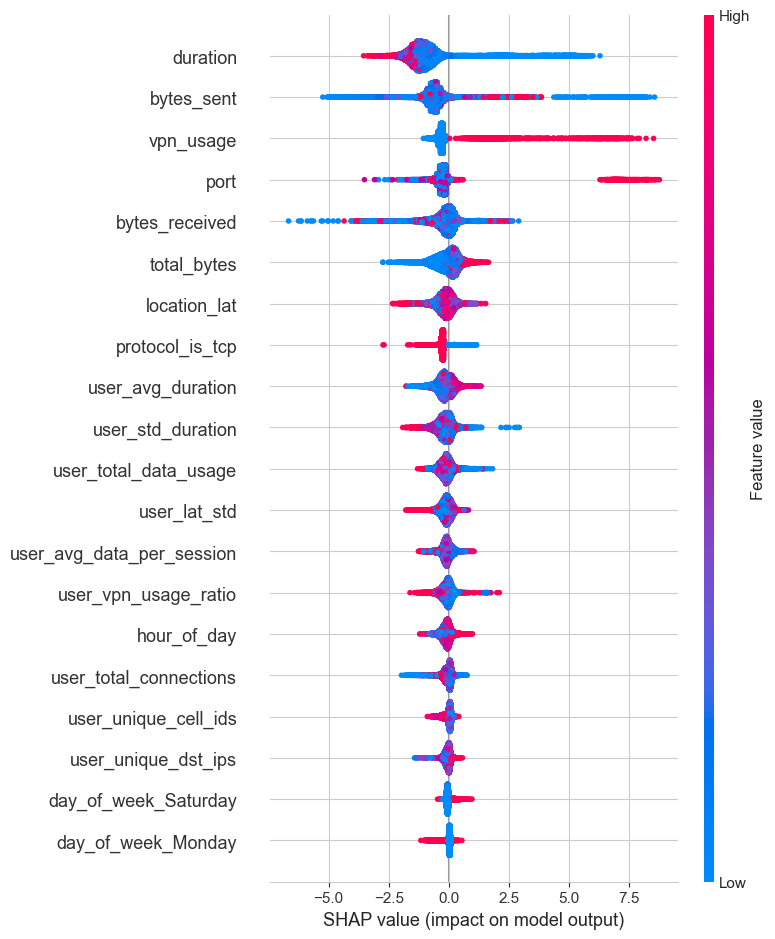


--- Explanation for a Single Correctly Identified Fraud Case ---
Explaining prediction for original index: 72420


In [31]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# This cell assumes your pipeline has been trained and you have all necessary variables
# (model_pipeline_weighted, X_test, y_test, y_pred_weighted, etc.)

# --- Visualize Global Feature Importance ---
print("\n--- Global Feature Importance (SHAP Summary Plot) ---")
print("This plot shows the impact of each feature on the model's output.")
print("Red points indicate a high feature value, blue points a low one.")

# The summary plot is one of the most powerful visualizations in SHAP
# This part of your code is correct.
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot")


# --- Visualize a Single Prediction (Force Plot) ---
print("\n--- Explanation for a Single Correctly Identified Fraud Case ---")

# Find the index of the first true fraud case in the test set that the model also predicted as fraud
correct_fraud_indices = y_test[(y_test == 1) & (y_pred_weighted == 1)].index
if len(correct_fraud_indices) > 0:
    # Get the first correct prediction's original index
    target_index = correct_fraud_indices[0]
    
    # Find its integer location in the X_test array
    target_loc = X_test.index.get_loc(target_index)

    print(f"Explaining prediction for original index: {target_index}")

    # --- FIX IS HERE ---
    # We must use the transformed data (X_test_transformed_df) for the feature values
    # to ensure its dimensions match the dimensions of the shap_values.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[target_loc, :],
        X_test_transformed_df.iloc[target_loc, :] # Use the transformed data here
    ))
else:
    print("No correctly identified fraud cases found in the test set to explain.")



In [32]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

# This code assumes you have the following objects already created and trained in your notebook:
# - model_pipeline_weighted: Your final, trained scikit-learn pipeline.
# - X_train: The DataFrame used for training (needed to get the column order).

def predict_and_explain(new_data_point, training_columns):
    """
    Takes a single new data point (as a dictionary), uses the full scikit-learn
    pipeline to process and predict, and then explains the prediction with SHAP.

    Args:
        new_data_point (dict): A dictionary containing all the raw feature values.
        training_columns (pd.Index): The columns from the X_train DataFrame.
    """
    print("--- Starting Prediction and Explanation ---")

    # 1. Convert the new data point into a DataFrame
    # The pipeline expects a DataFrame with the exact same columns as the training data.
    new_df = pd.DataFrame([new_data_point])
    
    # Ensure the column order and presence matches the training data exactly.
    # This is a crucial step for robustness.
    new_df = new_df.reindex(columns=training_columns, fill_value=0)

    # 2. Make a Prediction using the End-to-End Pipeline
    # The pipeline automatically handles all steps: feature selection, scaling,
    # one-hot encoding, and prediction. This is the key simplification.
    print("Step 1: Processing data and making a prediction...")
    prediction = model_pipeline_weighted.predict(new_df)[0]
    prediction_proba = model_pipeline_weighted.predict_proba(new_df)[0]

    # 3. Explain the Prediction with SHAP
    print("Step 2: Explaining the prediction...")
    
    # Extract the fitted classifier and preprocessor from the pipeline
    classifier = model_pipeline_weighted.named_steps['classifier']
    preprocessor = model_pipeline_weighted.named_steps['preprocessor']
    
    # Transform the single data point to get the feature values the model saw
    transformed_data = preprocessor.transform(new_df)
    
    # Reconstruct the final feature names after preprocessing
    numeric_features = preprocessor.transformers_[0][2]
    low_cardinality_categorical_features = preprocessor.transformers_[1][2]
    onehot_encoder = preprocessor.named_transformers_['cat']
    ohe_categories = onehot_encoder.categories_
    ohe_feature_names = []
    for i, col in enumerate(low_cardinality_categorical_features):
        for cat in ohe_categories[i]:
            ohe_feature_names.append(f"{col}_{cat}")
    final_feature_names = list(numeric_features) + ohe_feature_names

    # Create a DataFrame for the transformed data with correct column names
    if hasattr(transformed_data, "toarray"):
        transformed_data_dense = transformed_data.toarray()
    else:
        transformed_data_dense = transformed_data
    transformed_df = pd.DataFrame(transformed_data_dense, columns=final_feature_names)
    
    # Create the SHAP explainer and get values for the single point
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer(transformed_df)

    # --- Display Results ---
    print("\n" + "="*20 + " PREDICTION RESULT " + "="*20)
    if prediction == 1:
        print(f"Prediction: FRAUD DETECTED (Confidence: {prediction_proba[1]:.2%})")
    else:
        print(f"Prediction: Normal Traffic (Confidence: {prediction_proba[0]:.2%})")
    print("="*59 + "\n")

    print("Explanation (Why did the model make this decision?):")
    # Display the force plot. We use the transformed data to match SHAP's dimensions.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[0, :],
        transformed_df.iloc[0, :]
    ))

# --- Example Usage ---
# Create a sample data point. It MUST contain all the raw features that your
# model was trained on (i.e., all columns in X_train).

# Scenario: A suspicious data point
suspicious_activity = {
    # Original Features
    'port': 4444,
    'duration': 300.5,
    'bytes_sent': 9000000,
    'bytes_received': 50000,
    'vpn_usage': 1, # Use 1 for True
    'location_lat': 55.75,
    'location_lon': 37.61,
    'total_bytes': 9050000,
    'hour_of_day': 2,
    'day_of_week': 'Monday',
    'tld': 'ru',
    'protocol_is_tcp': 0, # Use 0 for UDP
    
    # Engineered User-Level Features (these would be looked up from a database in a real system)
    'user_total_connections': 5,
    'user_unique_dst_ips': 4,
    'user_unique_cell_ids': 2,
    'user_avg_duration': 25.0,
    'user_std_duration': 10.0,
    'user_total_data_usage': 10000000,
    'user_avg_data_per_session': 2000000,
    'user_vpn_sessions': 1,
    'user_lat_std': 0.5,
    'user_lon_std': 0.5,
    'user_vpn_usage_ratio': 0.2,
    
    # Engineered Time-Window Features (also looked up from a database)
    'user_events_last_24h': 50,
    'user_events_last_1h': 25,
    'user_bytes_last_24h': 9500000
}
# --- Scenario 2: A likely normal data point ---

print("\n\n" + "#"*60)
print("### RUNNING A NEW SCENARIO: NORMAL ACTIVITY ###")
print("#"*60 + "\n")

normal_activity = {
    # Original Features
    'port': 443,
    'duration': 25.5,
    'bytes_sent': 5200,
    'bytes_received': 12400,
    'vpn_usage': 0, # Use 0 for False
    'location_lat': 34.05,
    'location_lon': -118.24,
    'total_bytes': 17600,
    'hour_of_day': 14,
    'day_of_week': 'Tuesday',
    'tld': 'com',
    'protocol_is_tcp': 1, # Use 1 for TCP
    
    # Engineered User-Level Features (simulating a typical user)
    'user_total_connections': 85,
    'user_unique_dst_ips': 40,
    'user_unique_cell_ids': 5,
    'user_avg_duration': 30.0,
    'user_std_duration': 15.2,
    'user_total_data_usage': 4500000,
    'user_avg_data_per_session': 52941,
    'user_vpn_sessions': 0,
    'user_lat_std': 0.01,
    'user_lon_std': 0.01,
    'user_vpn_usage_ratio': 0.0,
    
    # Engineered Time-Window Features (simulating low recent activity)
    'user_events_last_24h': 10,
    'user_events_last_1h': 2,
    'user_bytes_last_24h': 500000
}

# Call the function with the new data point and the same training columns
predict_and_explain(normal_activity, X_train.columns)


# Call the function with the new data point and the columns from your training set
predict_and_explain(suspicious_activity, X_train.columns)




############################################################
### RUNNING A NEW SCENARIO: NORMAL ACTIVITY ###
############################################################

--- Starting Prediction and Explanation ---
Step 1: Processing data and making a prediction...
Step 2: Explaining the prediction...

==================== PREDICTION RESULT ====================
Prediction: Normal Traffic (Confidence: 99.99%)

Explanation (Why did the model make this decision?):


--- Starting Prediction and Explanation ---
Step 1: Processing data and making a prediction...
Step 2: Explaining the prediction...

==================== PREDICTION RESULT ====================
Prediction: FRAUD DETECTED (Confidence: 99.47%)

Explanation (Why did the model make this decision?):
